In [2]:
# Importing Dataset
import pandas as pd

# Load dataset
data = pd.read_csv('C:/Users/Win-10/Documents/PredictiveMaintenance/data/predictive_maintenance_dataset.csv/predictivemaintenance.csv')

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Display all rows of the dataset
print(data)

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0        1     M14860    M                298.1                    308.6   
1        2     L47181    L                298.2                    308.7   
2        3     L47182    L                298.1                    308.5   
3        4     L47183    L                298.2                    308.6   
4        5     L47184    L                298.2                    308.7   
5        6     M14865    M                298.1                    308.6   
6        7     L47186    L                298.1                    308.6   
7        8     L47187    L                298.1                    308.6   
8        9     M14868    M                298.3                    308.7   
9       10     M14869    M                298.5                    309.0   
10      11     H29424    H                298.4                    308.9   
11      12     H29425    H                298.6                    309.1   
12      13  

In [3]:
#Data Preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing target values (if any)
data = data.dropna(subset=['Machine failure'])

# Optionally, fill missing values in other columns with the mean or median
data.fillna(data.mean(numeric_only=True), inplace=True)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


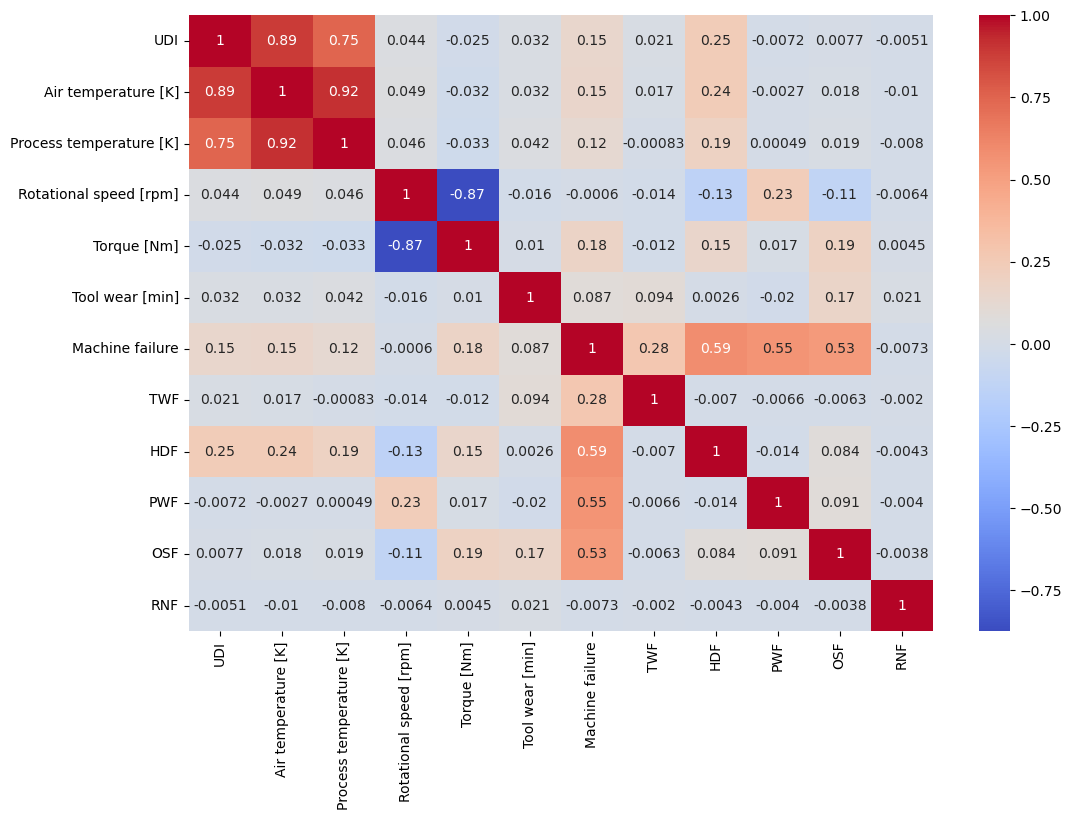

In [4]:
#Feature Selection
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of numerical features with the exact column names
numerical_features = [
    'UDI','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]',
    'Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF']

# Compute the correlation matrix for numerical features only
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
#Feature Selection
# Based on the correlation analysis, select features
# Assuming that we select features that have a high correlation with 'Machine failure'
selected_features = [
    'Air temperature [K]', 'Process temperature [K]', 
    'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'
]

# Prepare the feature set X and the target variable y
X = data[selected_features]
y = data['Machine failure']

In [6]:
#Data Spliting
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 1924
Testing set size: 482


In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test were prepared from the selected features in the previous step
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled data to check
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

print("Scaled Testing Data (first 5 rows):")
print(X_test_scaled[:5])

Scaled Training Data (first 5 rows):
[[ 0.00482741  0.79857836 -0.49500287  0.01743195 -0.37037073]
 [ 0.04782714  0.1341481  -0.92537711  0.87199487  0.15838621]
 [ 1.98281479  1.40260587  0.13149129  0.63070652 -1.07019608]
 [-0.03817231  0.61737011 -0.1354497   0.13807613 -0.71250757]
 [-0.12417176 -0.7114904   0.40932782 -0.82707728  0.98262496]]
Scaled Testing Data (first 5 rows):
[[ 2.15481369  2.00663337 -0.16813635 -0.09315854  0.11173118]
 [-0.21017122  0.0133426   4.94187683 -2.61663255 -1.00798939]
 [ 0.04782714  0.73817561 -0.44052511  0.6910286  -0.07488891]
 [ 2.19781341  2.18784162  1.46619622 -1.50067393  1.13814171]
 [-0.8551671  -0.7114904  -0.90903379  1.16355163 -0.02823389]]


In [8]:
#Model Training 
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9875518672199171
Confusion Matrix:
[[461   0]
 [  6  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       461
           1       1.00      0.71      0.83        21

    accuracy                           0.99       482
   macro avg       0.99      0.86      0.91       482
weighted avg       0.99      0.99      0.99       482

